In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns
import warnings
# import statsmodels.api as sm

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)

df.head(3)

columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")', 'Цвет', 'Оптическая стабилизация','Оптический зум на увеличение (x)',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)", 
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Гарантия предоставляется', 'Страна', 'Основная камера МПикс','Съемка видео в портретном режиме', 'Фронтальная камера МПикс',
                  'Количество основных камер (шт)', 'Состояние', 'Безрамочный', 'Материал корпуса']
target = ['salePrice']

df1 = df[columns_needed + target + ['product_id', 'name']]
df1[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df1['memory2'] = df1["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df1['memory3'] = df1["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df1['memory4'] = df1["name"].apply(lambda x: get_memory_from_name(x))
df1['memory'] = df1.apply(choose, axis=1)

df1 = df1.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df1['height1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df1['width1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df1['depth1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df1['height2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df1['width2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df1['depth2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df1['height'] = df1.apply(choose_h, axis=1)
df1['width'] = df1.apply(choose_w, axis=1)
df1['depth'] = df1.apply(choose_d, axis=1)

df1 = df1.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 
                        'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return 720.0

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return 720.0



df1['video_resolution_v'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df1['video_resolution_h'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df1['screen_resolution_h'] = df1["Разрешение экрана"].apply(lambda x: get_res_0(x))
df1['screen_resolution_v'] = df1["Разрешение экрана"].apply(lambda x: get_res_1(x))

df1['screen_diag'] = df1["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df1 = df1.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return 0.0

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return 0.0


df1['dust_IP'] = df1["Степень защиты"].apply(lambda x: get_dust_IP(x))
df1['water_IP'] = df1["Степень защиты"].apply(lambda x: get_water_IP(x))

df1 = df1.drop(columns=["Степень защиты"])

df1['zoom'] = df1['Цифровой зум (x)']
df1['weight'] = df1['Вес (г)']
df1['kernel_cnt'] = df1['Количество ядер']
df1['screen_technology'] = df1['Технология экрана']
df1['power'] = df1['Мощность блока питания (Вт)']

metals = ['металл', 'титан', 'алюм', 'сталь']
df1['frame_has_metal'] = df1['Материал корпуса'].apply(lambda x: any(metal in x.lower() for metal in metals) if type(x) == str else False).astype('int')
df1['frame_has_plastic'] = df1['Материал корпуса'].apply(lambda x: 'пластик' in x.lower() if type(x) == str else False ).astype('int')

df1 = df1.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)", "Материал корпуса"])

In [5]:
data = df1

In [6]:
data['is_new'] = data['Состояние'].apply(lambda x: 0 if x == 'восстановленный' else 1) # Состояние
data = data.drop(columns=['Состояние'])

In [7]:
iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

# Нормализуем словарь: убираем "iPhone ", приводим к нижнему регистру
normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}
# print(normalized_battery_capacity)

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        # Приводим серию к тому же формату
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        # print(series)
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

data['standarts'] = data['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
data['battery'] = data.apply(fill_iphone_capacity, axis=1)  # Емкость аккумулятора (мАч)
mean_battery = data['Емкость аккумулятора (мАч)'].mean()

data['is_5G'] = data['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
data['is_5G'] = data['is_5G'].astype(int)

data['frameless'] = (data['Безрамочный'] == 'Да').astype(int) # Безрамочный

# print(data.battery.unique())
# print(data['Емкость аккумулятора (мАч)'].unique())
def get_year(x): # Год релиза
    if x >= 2022.0:
        return int(x)
    return 2022

data['year'] = np.where(data['Год релиза'] != 2028, data['Год релиза'], 2023)
data['year'] = data['year'].apply(lambda x: get_year(x))

data = data.rename(columns={ 
                            'Количество основных камер (шт)' : 'main_cams',
                            })

In [8]:
# Список столбцов, где нужно заменить NaN на 0
columns_to_fill = [
    'Оптический зум на увеличение (x)'
]

data[columns_to_fill] = data[columns_to_fill].fillna(0)
data[['Съемка видео в портретном режиме','Оптическая стабилизация']] = data[['Съемка видео в портретном режиме', 'Оптическая стабилизация']].fillna("Нет")

# Преобразуем в список чисел
def parse_camera(s):
    mp_values = []
    for x in str(s).split('/'):
        if x.strip() == '0':
            continue
        try:
            # Пробуем преобразовать в число
            mp_values.append(float(x))
        except ValueError:
            # Если не число (например, "TOF"), пропускаем или добавляем 0
            continue
    return mp_values

data['camera_mp_parsed'] = data['Основная камера МПикс'].apply(parse_camera)
data['front_camera'] = data['Фронтальная камера МПикс'].apply(parse_camera)


data['opt_zoom'] = data['Оптический зум на увеличение (x)']
data = data.drop(columns=['Основная камера МПикс', 'Фронтальная камера МПикс', 'Страна',
                           'Оптический зум на увеличение (x)', 'Гарантия предоставляется','Оптическая стабилизация', 'Съемка видео в портретном режиме', 'Емкость аккумулятора (мАч)'])

In [9]:
data['camera_mp_parsed']

0            [12.0, 12.0]
1            [108.0, 5.0]
2      [50.0, 48.0, 12.5]
3      [48.0, 48.0, 12.0]
4        [64.0, 8.0, 2.0]
              ...        
924    [48.0, 12.0, 12.0]
925    [48.0, 12.0, 48.0]
926    [50.0, 10.0, 12.0]
927    [50.0, 50.0, 12.0]
928          [48.0, 12.0]
Name: camera_mp_parsed, Length: 929, dtype: object

In [10]:
data['front_camera_mp_total'] = data['front_camera'].apply(lambda x: sum(x) if isinstance(x, list) else 0)
data['main_camera_mp_total'] = data['camera_mp_parsed'].apply(lambda x: sum(x) if isinstance(x, list) else 0)

data = data.drop(columns=['front_camera', 'camera_mp_parsed'])

In [11]:
data['brand_Apple'] = (data['brand'] == 'Apple').astype(int)
data['brand_Samsung'] = (data['brand'] == 'Samsung').astype(int)
data['brand_Xiaomi'] = (data['brand'] == 'Xiaomi').astype(int)
data['brand_Tecno'] = (data['brand'] == 'Tecno').astype(int)
data['brand_HONOR'] = (data['brand'] == 'HONOR').astype(int)
data['brand_HUAWEI'] = (data['brand'] == 'HUAWEI').astype(int)
data['brand_Infinix'] = (data['brand'] == 'Infinix').astype(int)

In [12]:
data = data.drop(columns=['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")', 'Цвет',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Безрамочный', 'product_id', 'name', 'kernel_cnt', 'screen_technology', 'standarts', 'power'])

In [13]:
data.columns  # будем работать вот с этими признаками

Index(['main_cams', 'salePrice', 'memory', 'height', 'width', 'depth',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'zoom',
       'weight', 'frame_has_metal', 'frame_has_plastic', 'is_new', 'battery',
       'is_5G', 'frameless', 'year', 'opt_zoom', 'front_camera_mp_total',
       'main_camera_mp_total', 'brand_Apple', 'brand_Samsung', 'brand_Xiaomi',
       'brand_Tecno', 'brand_HONOR', 'brand_HUAWEI', 'brand_Infinix'],
      dtype='object')

# Мультиколлениарность

In [15]:
!pip install statsmodels


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
 import statsmodels.api as sm

ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (c:\Users\Валерия\OneDrive\Рабочий стол\ml\.venv\Lib\site-packages\scipy\_lib\_util.py)

In [18]:
X = data.drop(columns='salePrice')
y = data['salePrice']

nan_rate = X.isna().mean().sort_values(ascending=False)
print(nan_rate.head(15))

# Сколько строк имеют хотя бы один NaN
print("Rows with any NaN:", X.isna().any(axis=1).sum(), "out of", len(X))

zoom                     0.312164
depth                    0.286329
width                    0.285253
height                   0.285253
weight                   0.282024
screen_diag              0.032293
dust_IP                  0.026911
battery                  0.004306
front_camera_mp_total    0.002153
main_camera_mp_total     0.002153
video_resolution_h       0.000000
screen_resolution_h      0.000000
video_resolution_v       0.000000
main_cams                0.000000
memory                   0.000000
dtype: float64
Rows with any NaN: 570 out of 929


In [17]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns='salePrice')
y = data['salePrice']

X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)
X_scaled = pd.DataFrame(X_scaled, index=X_filled.index, columns=X_filled.columns)

NameError: name 'sm' is not defined

In [70]:
X_filled.front_camera_mp_total

0      12.0
1      16.0
2      13.0
3      12.0
4      16.0
       ... 
924    12.0
925    12.0
926    12.0
927    12.0
928    12.0
Name: front_camera_mp_total, Length: 929, dtype: float64

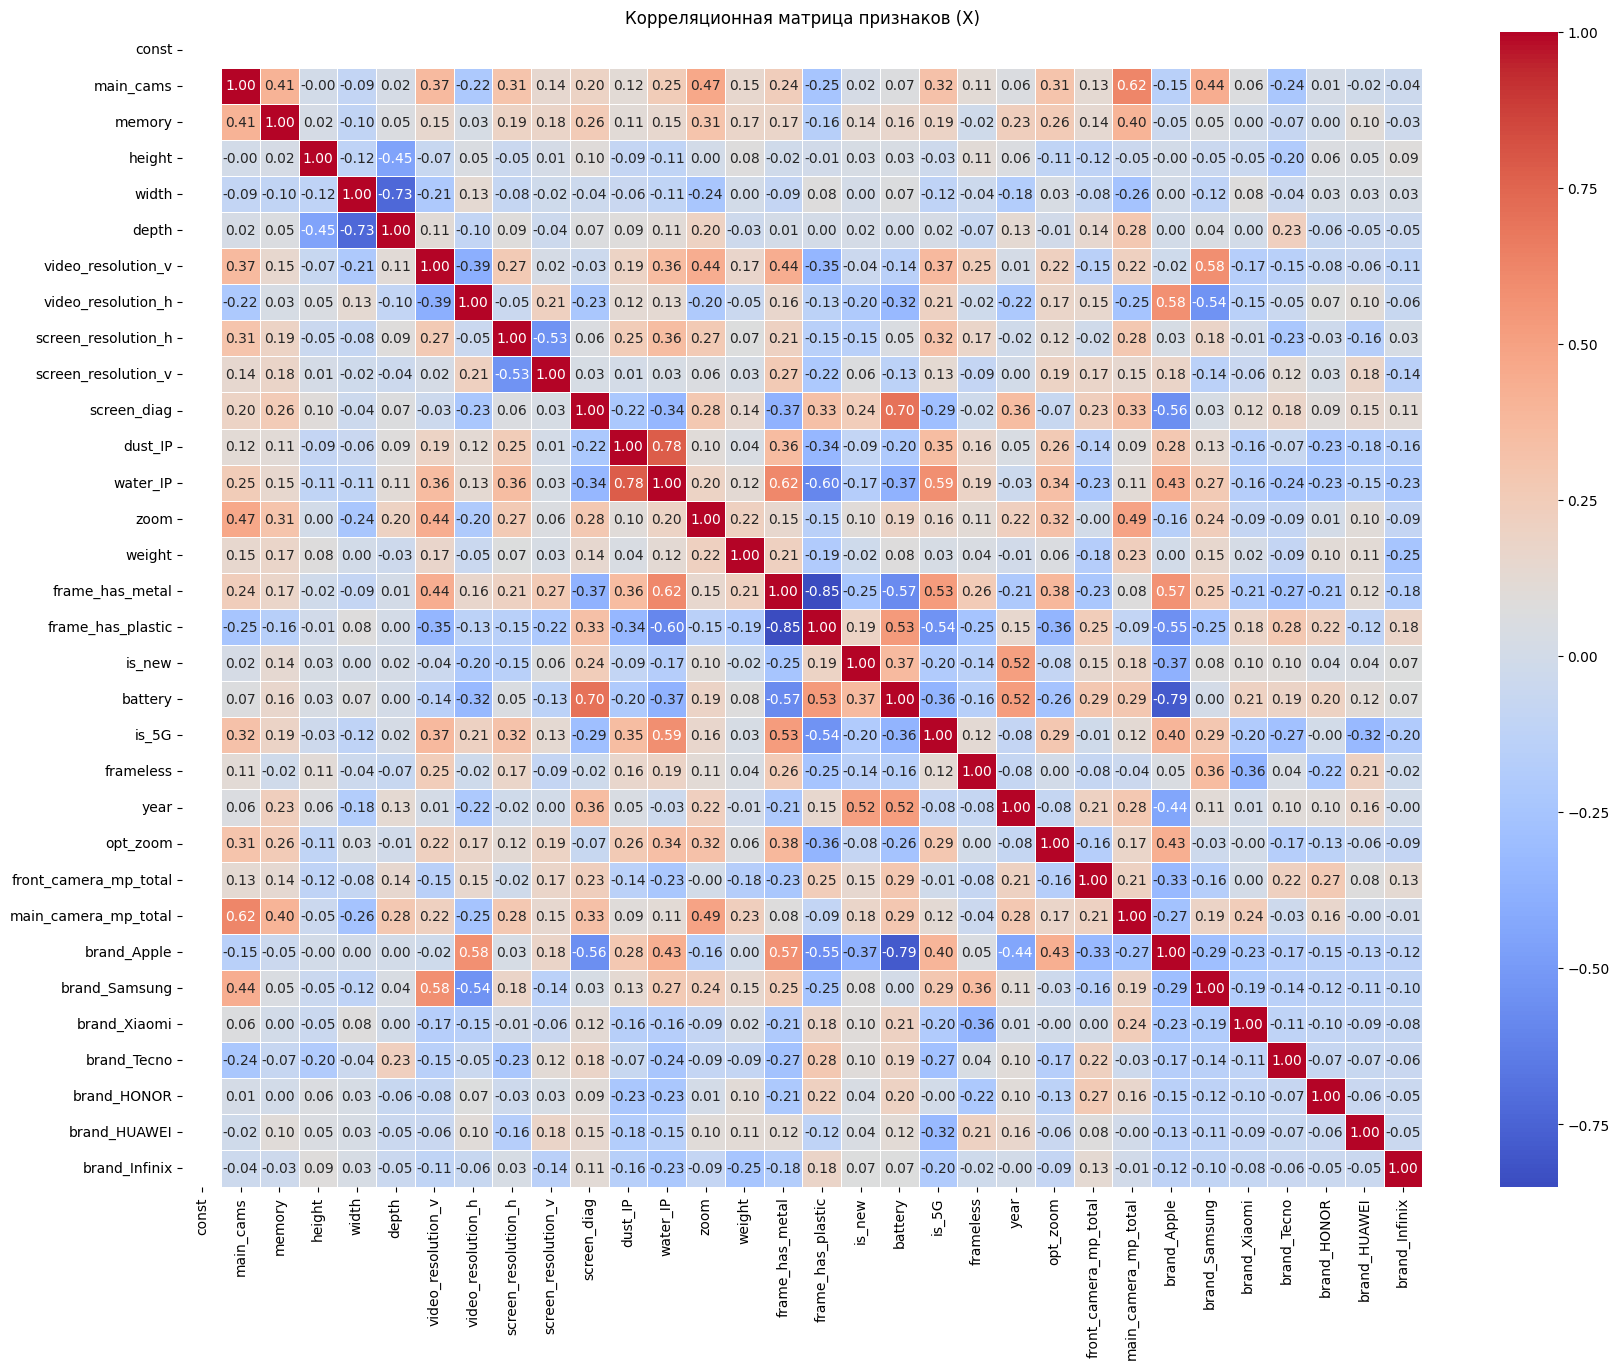

In [71]:
corr_matrix = X_filled.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X)")
plt.show()

Давайте пока уберем has_metal и has_plastique: точнее сделаем из них одну переменну. Также надо убрать battery_bin (сильная корреляция с brand_Apple)

In [72]:
X_filled['strong_frame'] = X_filled['frame_has_metal'] - X_filled['frame_has_plastic']
X_filled = X_filled.drop(columns=['frame_has_metal', 'frame_has_plastic'])

In [73]:
X_filled.columns

Index(['const', 'main_cams', 'memory', 'height', 'width', 'depth',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'zoom',
       'weight', 'is_new', 'battery', 'is_5G', 'frameless', 'year', 'opt_zoom',
       'front_camera_mp_total', 'main_camera_mp_total', 'brand_Apple',
       'brand_Samsung', 'brand_Xiaomi', 'brand_Tecno', 'brand_HONOR',
       'brand_HUAWEI', 'brand_Infinix', 'strong_frame'],
      dtype='object')

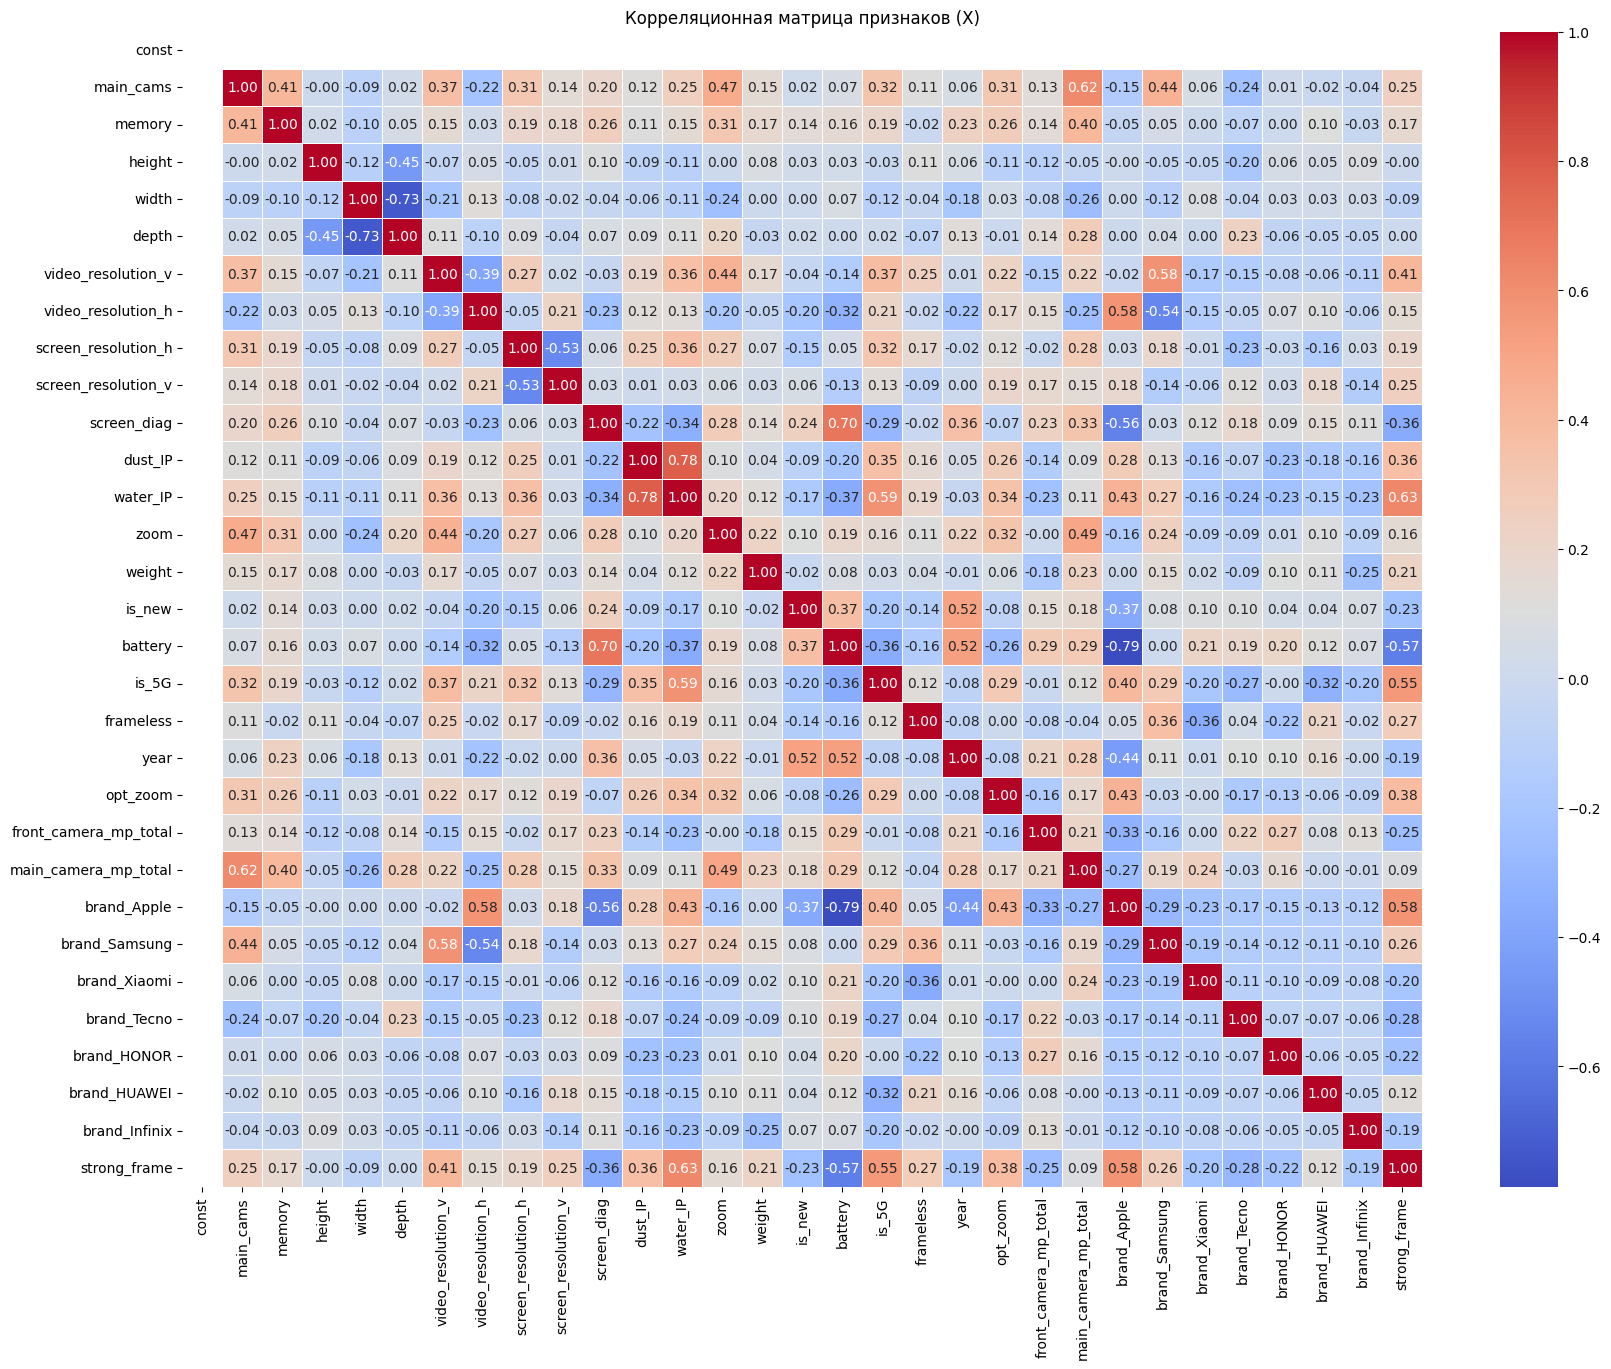

In [74]:
corr_matrix = X_filled.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X)")
plt.show()

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)


                  feature       VIF
0             brand_Apple  9.870583
1                   depth  8.542697
2                   width  6.542193
3                 battery  5.462524
4                water_IP  5.379111
5            strong_frame  4.442066
6           brand_Samsung  4.153618
7                  height  3.767653
8                 dust_IP  3.292562
9    main_camera_mp_total  3.267930
10     video_resolution_h  3.225892
11    screen_resolution_h  3.103757
12                  is_5G  3.096500
13    screen_resolution_v  3.052016
14              main_cams  2.988218
15            screen_diag  2.631178
16     video_resolution_v  2.430543
17           brand_HUAWEI  2.293055
18                   zoom  2.168234
19           brand_Xiaomi  2.134353
20                   year  2.130298
21               opt_zoom  2.057209
22  front_camera_mp_total  2.022238
23            brand_Tecno  1.776077
24              frameless  1.702473
25            brand_HONOR  1.649715
26                 is_new  1

In [76]:
model_sm = sm.OLS(y, X_filled).fit()
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     166.2
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        22:56:17   Log-Likelihood:                -10523.
No. Observations:                 929   AIC:                         2.111e+04
Df Residuals:                     898   BIC:                         2.126e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.789e+

Гетероскедастичность

In [77]:
model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     319.5
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        22:56:17   Log-Likelihood:                -10523.
No. Observations:                 929   AIC:                         2.111e+04
Df Residuals:                     898   BIC:                         2.126e+04
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.789e+

График Остатки vs Предсказания 

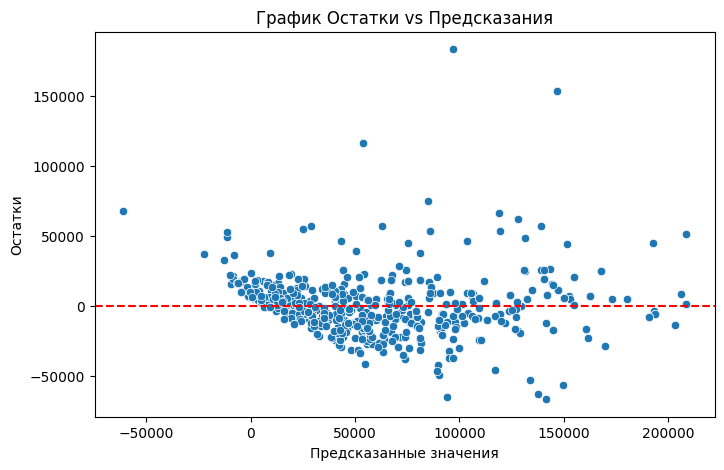

In [78]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

График свидетельствует о гетероскедастичности. Добавим к нему тест Уайта

In [79]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools.validation import array_like


def het_white(resid, exog):
    """
    White's Lagrange Multiplier Test for Heteroscedasticity.

    Parameters
    ----------
    resid : array_like
        The residuals. The squared residuals are used as the endogenous
        variable.
    exog : array_like
        The explanatory variables for the variance. Squares and interaction
        terms are automatically included in the auxiliary regression.

    Returns
    -------
    lm : float
        The lagrange multiplier statistic.
    lm_pvalue :float
        The p-value of lagrange multiplier test.
    fvalue : float
        The f-statistic of the hypothesis that the error variance does not
        depend on x. This is an alternative test variant not the original
        LM test.
    f_pvalue : float
        The p-value for the f-statistic.

    Notes
    -----
    Assumes x contains constant (for counting dof).

    question: does f-statistic make sense? constant ?

    References
    ----------
    Greene section 11.4.1 5th edition p. 222. Test statistic reproduces
    Greene 5th, example 11.3.
    """
    x = array_like(exog, "exog", ndim=2)
    y = array_like(resid, "resid", ndim=2, shape=(x.shape[0], 1))
    # _check_het_test(x, "White's heteroskedasticity")
    nobs, nvars0 = x.shape
    i0, i1 = np.triu_indices(nvars0)
    exog = x[:, i0] * x[:, i1]
    nobs, nvars = exog.shape
    assert nvars == nvars0 * (nvars0 - 1) / 2. + nvars0
    resols = sm.OLS(y ** 2, exog).fit()
    fval = resols.fvalue
    fpval = resols.f_pvalue
    lm = nobs * resols.rsquared

    lmpval = stats.chi2.sf(lm, resols.df_model)
    return lm, lmpval, fval, fpval



white_test = het_white(residuals, X_filled)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for name, value in zip(labels, white_test):
    print(f"{name}: {value:.4f}")

Test Statistic: 655.9175
Test Statistic p-value: 0.0000
F-Statistic: 3.5262
F-Test p-value: 0.0000


График свидетельтвует о неправильно выбранной функциональной форме, тест Уайта свидетельсвует о гетероскедастичности. Для того, чтобы устранить гетероскедастичность, воспользуемся стандартными ошибками в форме Уайта.

Выбор функциональной формы

Выберем между линейной и полулогарифмической моделью с помощью теста Бокса-Кокса

In [80]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import chi2

# Пусть у нас есть:
y = df['salePrice'].copy()

n = len(y)
lambda_test = 0  # Проверим логарифмическую модель
Yg = np.exp(np.mean(np.log(y)))

# Zaremba's Box-Cox transformed response:
Z = (np.power(y, lambda_test) - 1) / (lambda_test * Yg**(lambda_test - 1)) if lambda_test != 0 else np.log(y)

# Модель 1: Обычная
model1 = sm.OLS(y, X_filled).fit()
RSS1 = np.sum(model1.resid ** 2)

# Модель 2: Преобразованная
model2 = sm.OLS(Z, X_filled).fit()
RSS2 = np.sum(model2.resid ** 2)

# Статистика
LM = n * np.log(RSS1 / RSS2)
p_value = 1 - chi2.cdf(LM, df=1)

print(f"RSS (линейная модель): {RSS1:.2f}")
print(f"RSS (лог-преобразованная модель): {RSS2:.2f}")
print(f"Статистика LM: {LM:.3f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Отвергаем H0: логарифмическая модель лучше.")
else:
    print("Нет оснований отвергать H0: можно оставить линейную модель.")


RSS (линейная модель): 374909571109.45
RSS (лог-преобразованная модель): 67.12
Статистика LM: 20850.042
P-значение: 0.0000
Отвергаем H0: логарифмическая модель лучше.


In [81]:
y = np.log(y)
model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     478.4
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        22:56:19   Log-Likelihood:                -97.632
No. Observations:                 929   AIC:                             257.3
Df Residuals:                     898   BIC:                             407.1
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -153.00

Cнова проверим VIF, график остатки-предсказания.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)


                  feature       VIF
0             brand_Apple  9.870583
1                   depth  8.542697
2                   width  6.542193
3                 battery  5.462524
4                water_IP  5.379111
5            strong_frame  4.442066
6           brand_Samsung  4.153618
7                  height  3.767653
8                 dust_IP  3.292562
9    main_camera_mp_total  3.267930
10     video_resolution_h  3.225892
11    screen_resolution_h  3.103757
12                  is_5G  3.096500
13    screen_resolution_v  3.052016
14              main_cams  2.988218
15            screen_diag  2.631178
16     video_resolution_v  2.430543
17           brand_HUAWEI  2.293055
18                   zoom  2.168234
19           brand_Xiaomi  2.134353
20                   year  2.130298
21               opt_zoom  2.057209
22  front_camera_mp_total  2.022238
23            brand_Tecno  1.776077
24              frameless  1.702473
25            brand_HONOR  1.649715
26                 is_new  1

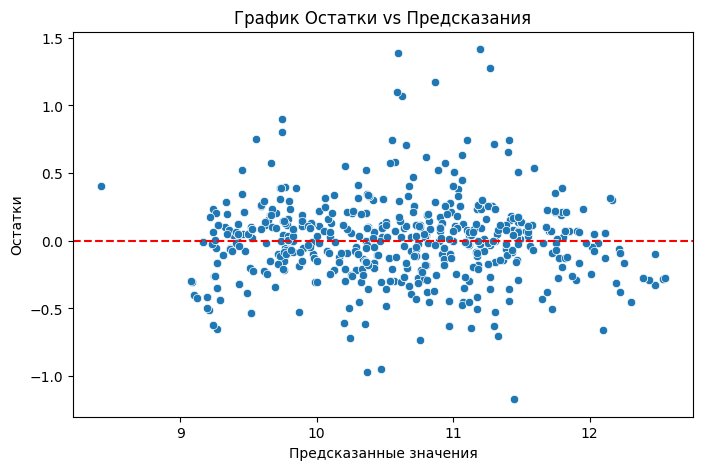

In [83]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

С новой функциональной формой график остатки-предсказания выглядит хорошо.

Заметим, что depth, width, height высоко коррелируют между собой. При этом логически кажется, что каждый из них может нести в себе часть информации для зависимой переменной. Преобразуем их с помощью PCA. Оставим количество компонент, опираясь на долю объясненной дисперсии.

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dims = X_filled[['video_resolution_v', 'video_resolution_h']].copy()

scaler = StandardScaler()
dims_scaled = scaler.fit_transform(dims)

pca = PCA(n_components=2)
dims_pca = pca.fit_transform(dims_scaled)

X_filled['dim_PC1'] = dims_pca[:, 0]
X_filled['dim_PC2'] = dims_pca[:, 1]

print("Доля объяснённой дисперсии:", pca.explained_variance_ratio_)


Доля объяснённой дисперсии: [0.69527868 0.30472132]


In [85]:
X_filled = X_filled.drop(columns = ['video_resolution_v', 'video_resolution_h'])
model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     478.4
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        22:56:19   Log-Likelihood:                -97.632
No. Observations:                 929   AIC:                             257.3
Df Residuals:                     898   BIC:                             407.1
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -152.90

Оставим только периметр

In [86]:
X_filled['P'] = X_filled['width'] + X_filled['height']
X_filled['IP'] = X_filled['dust_IP'] + X_filled['water_IP']
X_filled = X_filled.drop(columns=['width', 'height', 'dust_IP', 'water_IP', 'depth'])

model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     470.8
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        22:56:19   Log-Likelihood:                -119.08
No. Observations:                 929   AIC:                             294.2
Df Residuals:                     901   BIC:                             429.5
Df Model:                          27                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -148.28

In [87]:
X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                  feature       VIF
0             brand_Apple  9.022876
1                 battery  5.261907
2            strong_frame  4.344646
3           brand_Samsung  4.045562
4    main_camera_mp_total  3.033203
5     screen_resolution_h  3.018826
6               main_cams  2.952421
7                   is_5G  2.950543
8     screen_resolution_v  2.894852
9                 dim_PC1  2.702643
10            screen_diag  2.496563
11                dim_PC2  2.247728
12           brand_HUAWEI  2.239989
13                     IP  2.171866
14                   zoom  2.079799
15           brand_Xiaomi  2.068063
16                   year  2.038339
17  front_camera_mp_total  2.007392
18               opt_zoom  1.867896
19            brand_Tecno  1.688414
20              frameless  1.666345
21            brand_HONOR  1.627709
22                 is_new  1.552465
23                 memory  1.519687
24          brand_Infinix  1.411592
25                      P  1.400577
26                 weight  1

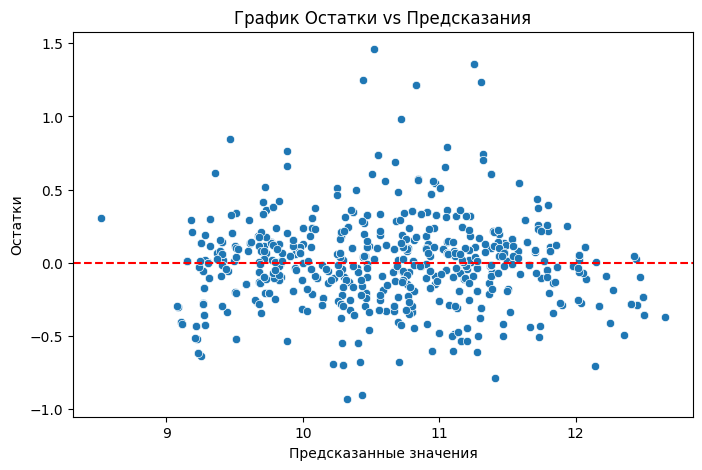

In [88]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

Выбор остальных функциональных форм - для каждой переменной построим регрессию логарифмической зависимой переменной на нее и по R^2 выберем наиболее хорошую форму

In [89]:
X_filled.columns

Index(['const', 'main_cams', 'memory', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'zoom', 'weight', 'is_new',
       'battery', 'is_5G', 'frameless', 'year', 'opt_zoom',
       'front_camera_mp_total', 'main_camera_mp_total', 'brand_Apple',
       'brand_Samsung', 'brand_Xiaomi', 'brand_Tecno', 'brand_HONOR',
       'brand_HUAWEI', 'brand_Infinix', 'strong_frame', 'dim_PC1', 'dim_PC2',
       'P', 'IP'],
      dtype='object')

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



log_price = np.log(data['salePrice'])
features = ['memory', 'screen_resolution_h', 'screen_resolution_v',
       'screen_diag', 'zoom', 'weight', 'is_new', 'is_5G', 'frameless', 'year',
       'opt_zoom', 'brand_Apple', 'brand_Samsung', 'brand_Xiaomi',
       'brand_Tecno', 'brand_HONOR', 'brand_HUAWEI', 'brand_Infinix',
       'strong_frame', 'dim_PC1', 'dim_PC2', 'P', 'IP']

# Варианты преобразований
transformations = {
    'x': lambda x: x,
    'sqrt(x)': lambda x: np.sqrt(x),
    'log(x)': lambda x: np.log(x),
    'x^2': lambda x: np.power(x, 2), 
    'x^3': lambda x: np.power(x, 3),
    'x^4': lambda x: np.power(x, 4),
    'x^5': lambda x: np.power(x, 5),
}

results = []

for feature in features:
    
    x_raw = X_filled[feature]
    y = log_price

    for name, func in transformations.items():
        try:
            # Преобразование и фильтрация NaN и -inf
            x_transformed = func(x_raw)
            df_valid = pd.DataFrame({'x': x_transformed, 'y': y}).dropna()
            if np.any(~np.isfinite(df_valid['x'])):
                continue  # Пропуск если после логарифма получились -inf/inf

            x_final = df_valid['x'].values.reshape(-1, 1)
            y_final = df_valid['y'].values

            model = LinearRegression().fit(x_final, y_final)
            r2 = r2_score(y_final, model.predict(x_final))

            results.append((feature, name, r2))
        except:
            continue  # например, log от отрицательных

# Вывод: по каждому признаку — лучшее преобразование
results_df = pd.DataFrame(results, columns=['Feature', 'Transformation', 'R2'])
best_transforms = results_df.sort_values(['Feature', 'R2'], ascending=[True, False]).groupby('Feature').first().reset_index()

print(best_transforms)

                Feature Transformation        R2
0                    IP            x^4  0.495507
1                     P            x^5  0.128859
2           brand_Apple              x  0.241322
3           brand_HONOR              x  0.008218
4          brand_HUAWEI              x  0.001738
5         brand_Infinix              x  0.033923
6         brand_Samsung              x  0.075613
7           brand_Tecno              x  0.072250
8          brand_Xiaomi              x  0.045041
9               dim_PC1         log(x)  0.470167
10              dim_PC2              x  0.343538
11            frameless              x  0.042148
12                is_5G              x  0.507242
13               is_new              x  0.000479
14               memory              x  0.215443
15             opt_zoom              x  0.266491
16          screen_diag         log(x)  0.041654
17  screen_resolution_h            x^5  0.200900
18  screen_resolution_v         log(x)  0.111842
19         strong_fr

In [91]:
X_filled['IP^2'] = np.square(X_filled['IP'])
X_filled['P^2'] = np.square(X_filled['P'])
# X_filled['log_dim_PC1'] = np.log1p(X_filled['dim_PC1'])
# X_filled['log_screen_diag'] = np.log1p(X_filled['screen_diag'])
X_filled['screen_resolution_h^2'] = np.square(X_filled['screen_resolution_h'])
X_filled['log_screen_resolution_v'] = np.log1p(X_filled['screen_resolution_v'])
X_filled['year^2'] = np.square(X_filled['year'])
X_filled['log_zoom'] = np.log1p(X_filled['zoom'])

In [92]:
model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     415.2
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        22:56:21   Log-Likelihood:                -84.232
No. Observations:                 929   AIC:                             236.5
Df Residuals:                     895   BIC:                             400.8
Df Model:                          33                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [93]:
X_filled.columns

Index(['const', 'main_cams', 'memory', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'zoom', 'weight', 'is_new',
       'battery', 'is_5G', 'frameless', 'year', 'opt_zoom',
       'front_camera_mp_total', 'main_camera_mp_total', 'brand_Apple',
       'brand_Samsung', 'brand_Xiaomi', 'brand_Tecno', 'brand_HONOR',
       'brand_HUAWEI', 'brand_Infinix', 'strong_frame', 'dim_PC1', 'dim_PC2',
       'P', 'IP', 'IP^2', 'P^2', 'screen_resolution_h^2',
       'log_screen_resolution_v', 'year^2', 'log_zoom'],
      dtype='object')

In [94]:
# X_filled = X_filled.drop(columns=['dop_screen', 
#                                                 'video_resolution_v', 'video_resolution_h',
#                                                 'screen_resolution_v', 'screen_resolution_h',
#                                                 'IP', 'memory',
#                                           'weight', 'frameless', 'main_cams'])
# X_filled['memory_sq'] = X_filled['memory']**2
# X_filled['IP_sq'] = X_filled['IP']**2
X_filled['weight_sq'] = (X_filled['weight'] - X_filled['weight'].mean())**2
X_filled['frameless_year'] = X_filled['frameless'] * X_filled['year']
# X_filled['main_cams_year'] = X_filled['main_cams'] * X_filled['year']
# X_filled['is_5G_year'] = X_filled['is_5G'] * X_filled['year']

# X_filled = X_filled.drop(columns=['IP', 'P', 'dim_PC1', 'screen_diag', 'screen_resolution_h', 'screen_resolution_v'])

X_filled['memory_log'] = np.log(X_filled['memory'])
X_filled['brand_Apple_memory'] = X_filled['brand_Apple']*X_filled['memory']
# X_filled['brand_Apple_main_cams'] = X_filled['brand_Apple']*X_filled['main_cams']
# X_filled['brand_Apple_front_camera_mp_total'] = X_filled['brand_Apple']*X_filled['front_camera_mp_total']
X_filled['brand_Samsung_front_camera_mp_total'] = X_filled['brand_Samsung']*X_filled['front_camera_mp_total']
X_filled['brand_HUAWEI_front_camera_mp_total'] = X_filled['brand_HUAWEI']*X_filled['front_camera_mp_total']
# X_filled['brand_Apple_main_camera_mp_total'] = X_filled['brand_Apple']*X_filled['main_camera_mp_total']
X_filled['brand_Samsung_main_camera_mp_total'] = X_filled['brand_Samsung']*X_filled['main_camera_mp_total']
X_filled['brand_HUAWEI_main_camera_mp_total'] = X_filled['brand_HUAWEI']*X_filled['main_camera_mp_total']

X_filled = X_filled.drop(columns=['IP', 'P', 'dim_PC1', 'screen_diag', 'screen_resolution_h', 
                                  'screen_resolution_v', 'memory', 'brand_Samsung', 'year', 'brand_HUAWEI', 'frameless'])

model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     502.0
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        22:56:21   Log-Likelihood:                -96.203
No. Observations:                 929   AIC:                             254.4
Df Residuals:                     898   BIC:                             404.3
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [95]:
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=0.8448419224633765, p=0.35826273615914606, df_denom=897, df_num=1>


Тестирование нормальности остатков

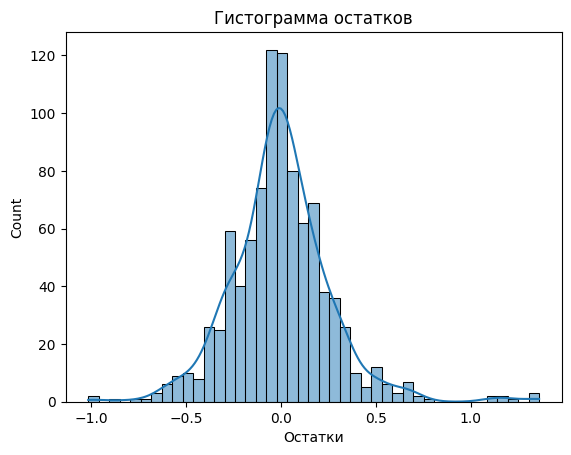

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals, kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.show()

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                                feature       VIF
0                           brand_Apple  9.583810
1    brand_Samsung_main_camera_mp_total  5.607507
2                              log_zoom  5.129095
3                  main_camera_mp_total  4.758211
4                                  zoom  4.491466
5                               battery  4.364723
6                          strong_frame  4.000210
7                    brand_Apple_memory  3.640627
8                                 is_5G  3.122324
9                             main_cams  2.912704
10                front_camera_mp_total  2.837056
11                           memory_log  2.789790
12                                 IP^2  2.731114
13  brand_Samsung_front_camera_mp_total  2.491423
14   brand_HUAWEI_front_camera_mp_total  2.420677
15                         brand_Xiaomi  2.417338
16    brand_HUAWEI_main_camera_mp_total  2.394907
17                screen_resolution_h^2  2.361698
18                              dim_PC2  2.241547


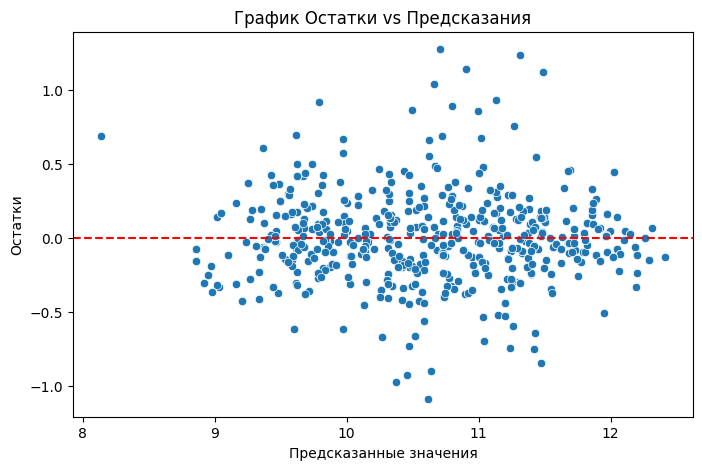

In [98]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

In [99]:
# Получим p-values и коэффициенты для всех признаков из итоговой модели
results = pd.DataFrame({
    'feature': model_sm.params.index,
    'coef': model_sm.params.values,
    'p_value': model_sm.pvalues.values
})

# Отсортируем по p_value в порядке возрастания
results_sorted = results.sort_values(by='p_value')

# Выведем признак, коэффициент и p-value
for _, row in results_sorted.iterrows():
    print(f"{row['feature']}: coef={row['coef']:.6f}, p_value={row['p_value']:.6f}")

is_new: coef=0.450822, p_value=0.000000
is_5G: coef=0.396227, p_value=0.000000
memory_log: coef=0.355418, p_value=0.000000
strong_frame: coef=0.257609, p_value=0.000000
brand_Apple: coef=0.606164, p_value=0.000000
log_zoom: coef=0.162085, p_value=0.000000
main_cams: coef=0.124882, p_value=0.000001
year^2: coef=0.000019, p_value=0.000001
zoom: coef=-0.004083, p_value=0.000001
frameless_year: coef=0.000055, p_value=0.000002
const: coef=-72.780018, p_value=0.000005
dim_PC2: coef=0.082653, p_value=0.000068
P^2: coef=-0.000004, p_value=0.002109
battery: coef=-0.000067, p_value=0.007360
brand_Apple_memory: coef=-0.000263, p_value=0.009430
brand_HUAWEI_front_camera_mp_total: coef=-0.005495, p_value=0.009710
opt_zoom: coef=0.023169, p_value=0.014424
IP^2: coef=0.000821, p_value=0.015282
screen_resolution_h^2: coef=0.000000, p_value=0.028736
main_camera_mp_total: coef=0.000770, p_value=0.038103
weight: coef=0.001434, p_value=0.052351
log_screen_resolution_v: coef=0.118730, p_value=0.183167
bran

In [100]:
X_filled.columns

Index(['const', 'main_cams', 'zoom', 'weight', 'is_new', 'battery', 'is_5G',
       'opt_zoom', 'front_camera_mp_total', 'main_camera_mp_total',
       'brand_Apple', 'brand_Xiaomi', 'brand_Tecno', 'brand_HONOR',
       'brand_Infinix', 'strong_frame', 'dim_PC2', 'IP^2', 'P^2',
       'screen_resolution_h^2', 'log_screen_resolution_v', 'year^2',
       'log_zoom', 'weight_sq', 'frameless_year', 'memory_log',
       'brand_Apple_memory', 'brand_Samsung_front_camera_mp_total',
       'brand_HUAWEI_front_camera_mp_total',
       'brand_Samsung_main_camera_mp_total',
       'brand_HUAWEI_main_camera_mp_total'],
      dtype='object')

In [101]:
X_filled = X_filled[['is_new', 'brand_Apple', 'is_5G', 'memory_log', 'strong_frame', 'main_cams', 'log_zoom', 
                     'frameless_year', 'year^2', 'dim_PC2', 'const', 'P^2', 'brand_Apple_memory', 'brand_HUAWEI_front_camera_mp_total', 
                    'IP^2', 'opt_zoom']]

Критические значения: t1 = -1.96, t2 = 1.96


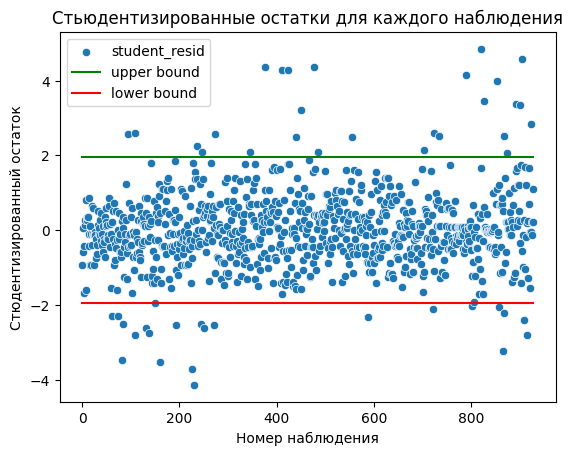

Удалено 5 выбросов. Размер X_filled_clean: (924, 16)


In [102]:
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_wo_const = X_filled.drop(columns=["const"], errors="ignore")  # если добавляла константу
X_scaled = scaler.fit_transform(X_wo_const)
X_scaled = pd.DataFrame(X_scaled, index=X_filled.index, columns=X_wo_const.columns)

# Теперь добавь константу
X_scaled["const"] = 1
n, k = X_scaled.shape

# Стьюдентизированные остатки
alpha = 0.05
dfree = n - k  # n и k уже определены выше
t_crit = t.ppf(1 - alpha/2, dfree)
print(f"Критические значения: t1 = {-t_crit:.2f}, t2 = {t_crit:.2f}")
st_errors = model_sm.outlier_test()
fig, ax = plt.subplots()
n, k = X_scaled.shape
sns.scatterplot(data=st_errors, x=st_errors.index, y = "student_resid", ax=ax, label="student_resid")
sns.lineplot(x=st_errors.index, y=[1.96]*n, ax=ax, label="upper bound", color="green")
sns.lineplot(x=st_errors.index, y=[-1.96]*n, ax=ax, label="lower bound", color="red")
plt.title("Стьюдентизированные остатки для каждого наблюдения")
plt.xlabel("Номер наблюдения")
plt.ylabel("Стюдентизированный остаток")
plt.show()
outliers_test_1 = st_errors[(st_errors["student_resid"] >= 1.96) | (st_errors["student_resid"] <= -1.96)][["student_resid"]]
outliers_test_1["index"] = outliers_test_1.index
outliers_test_1 = outliers_test_1[["student_resid", "index"]]
# outliers_test_1
# Левериндж
X = X_scaled.to_numpy()
XTX_inv = np.linalg.inv(X.T @ X) # обратная матрица X'X
leverage = np.diag(X @ XTX_inv @ X.T) # диагональные элементы - точки левериджа

# Создадим DataFrame linreg_data с нужными столбцами
linreg_data = X_scaled.copy()
linreg_data["leverage"] = leverage
linreg_data["index"] = linreg_data.index
linreg_data = linreg_data.merge(st_errors[["student_resid"]], left_index=True, right_index=True)
linreg_data["index"] = linreg_data.index  # убедимся, что индекс есть

# Порог для левериджа
const = 2 * k / n

# Найдем выбросы по левериджу
outliers_test_2 = linreg_data[linreg_data["leverage"] > const][["index", "leverage"]]
outliers_test_2
linreg_data["DFFITS"] = linreg_data["student_resid"] * np.sqrt(linreg_data["leverage"] / (1 - linreg_data["leverage"]))

const = 2 * np.sqrt(k / n)

outliers_test_3 = linreg_data[linreg_data["DFFITS"].abs() > const][["index", "DFFITS"]]
# Получаем индексы выбросов по каждому тесту
outlier_idx_1 = set(outliers_test_1['index'])
outlier_idx_2 = set(outliers_test_2['index'])
outlier_idx_3 = set(outliers_test_3['index'])

# Находим пересечение индексов (выбросы по всем трем тестам)
outlier_idx_all = outlier_idx_1 & outlier_idx_2 & outlier_idx_3

# Удаляем эти строки из X_filled
X_filled_clean = X_filled.drop(index=outlier_idx_all)
y_clean = y.drop(index=outlier_idx_all)

print(f"Удалено {len(outlier_idx_all)} выбросов. Размер X_filled_clean: {X_filled_clean.shape}")

In [103]:
model_sm = sm.OLS(y_clean, X_filled_clean).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     925.3
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        22:56:25   Log-Likelihood:                -106.57
No. Observations:                 924   AIC:                             245.1
Df Residuals:                     908   BIC:                             322.4
Df Model:                          15                                         
Covariance Type:                  HC3                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
is_n

In [104]:
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=1.4490674662400802, p=0.22899171547217453, df_denom=907, df_num=1>


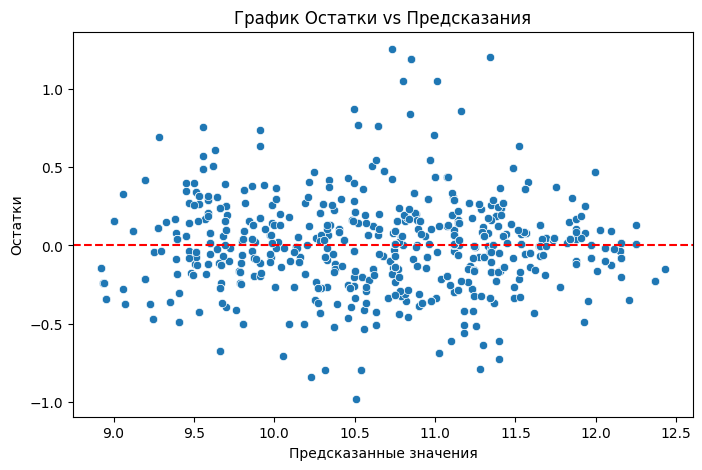

In [105]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

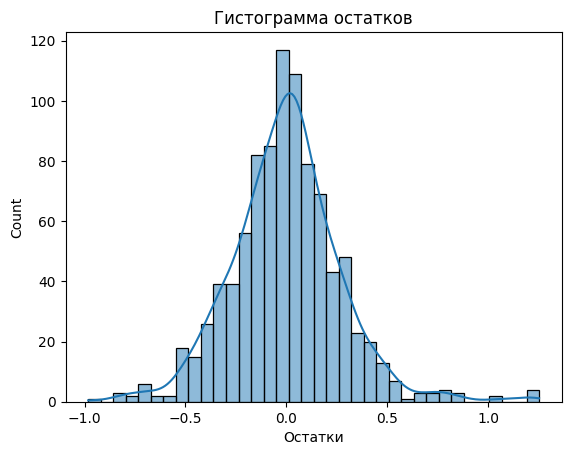

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals, kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.show()

In [107]:
results = pd.DataFrame({
    'feature': model_sm.params.index,
    'coef': model_sm.params.values,
    'p_value': model_sm.pvalues.values
})

# Отсортируем по p_value в порядке возрастания
results_sorted = results.sort_values(by='p_value')

# Выведем признак, коэффициент и p-value
for _, row in results_sorted.iterrows():
    print(f"{row['feature']}: coef={row['coef']:.6f}, p_value={row['p_value']:.6f}")

memory_log: coef=0.397736, p_value=0.000000
brand_Apple: coef=0.703510, p_value=0.000000
is_new: coef=0.466310, p_value=0.000000
strong_frame: coef=0.292233, p_value=0.000000
is_5G: coef=0.420988, p_value=0.000000
main_cams: coef=0.198270, p_value=0.000000
log_zoom: coef=0.099210, p_value=0.000001
year^2: coef=0.000015, p_value=0.000001
brand_Apple_memory: coef=-0.000359, p_value=0.000001
frameless_year: coef=0.000048, p_value=0.000002
const: coef=-55.957199, p_value=0.000009
dim_PC2: coef=0.077969, p_value=0.000011
P^2: coef=-0.000005, p_value=0.000015
IP^2: coef=0.000966, p_value=0.000258
brand_HUAWEI_front_camera_mp_total: coef=-0.003714, p_value=0.001701
opt_zoom: coef=0.011603, p_value=0.087666


In [108]:
X_filled.head()

,is_new,brand_Apple,is_5G,memory_log,strong_frame,main_cams,log_zoom,frameless_year,year^2,dim_PC2,const,P^2,brand_Apple_memory,brand_HUAWEI_front_camera_mp_total,IP^2,opt_zoom
0,1,1,1,4.852030,1,2,1.791759,0,4088484,0.691285,1.0,54264.8542,128.0,0.0,196.0,0.0
1,1,0,1,5.545177,-1,2,3.003061,0,4100625,0.691285,1.0,56786.8900,0.0,0.0,121.0,0.0
2,1,0,0,6.238325,1,3,4.615121,2024,4096576,0.691285,1.0,56453.7600,0.0,13.0,196.0,3.5
3,1,1,1,5.545177,1,3,3.258097,0,4096576,0.691285,1.0,54264.8542,256.0,0.0,196.0,5.0
4,1,0,0,6.238325,-1,3,3.003061,0,4092529,-0.714623,1.0,55696.0000,0.0,0.0,81.0,2.0


In [ ]:
import numpy as np

df = pd.concat([y, X_filled, X_filled2['battery']], axis=1)

features = ' + '.join(X_filled.columns)
features_without_memory = []
for e in X_filled.columns:
    if e != 'memory_log':
        features_without_memory.append(e)
features_for_2sls = ' + '.join(features_without_memory)

ols_model = sm.OLS(y, X_filled).fit()

ols_residuals = ols_model.resid

exog = sm.add_constant(X_filled)

instruments = X_filled2[['battery']]
extended_exog = np.hstack((X_filled, instruments))
aux_model = sm.OLS(ols_residuals, extended_exog).fit()
wald_stat = (aux_model.params[-1] / aux_model.bse[-1])**2
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print(f"\nСтатистика Вальда: {wald_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

# P-value меньше 0.05, значит эндогенности нет =)